- austen-sense.txt : 문서를 사용하여 다음 지시사항을 수행하라.
1. 토큰 생성 : 정규표현식으로 단어 토큰을 생성한다.
2. 형태소 분석을 하여 명사만 추출한다.
3. 추출된 명사리스트를 사용하여 출현빈도 수를 구하라
4. 명사출현빈도를 사용하여 wordcloud를 작성하라.
   - 워드클라우드 모양은 임의의 이미지를 사용하여 지정한다.

In [1]:
import nltk 

In [2]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
sense_raw = nltk.corpus.gutenberg.raw('austen-sense.txt')
sense_raw[:500]

'[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settled in Sussex.\nTheir estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.\nThe late owner of this estate was a single man, who lived\nto a very advanced age, and who for many years of his life,\nhad a constant companion an'

- 토큰 생성
- 정규 표현식으로 토큰 생성

In [10]:
# 문장 단위 토큰
from nltk.tokenize import sent_tokenize
print(sent_tokenize(sense_raw[:10000])[1])

Their estate was large, and their residence was at Norland Park,
in the centre of their property, where, for many generations,
they had lived in so respectable a manner as to engage
the general good opinion of their surrounding acquaintance.


In [6]:
# 단어 단위 토큰 생성
from nltk.tokenize import word_tokenize
print(word_tokenize(sense_raw[10:100]))

['Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settle']


In [7]:
# 정규 표현식 토큰 생성
from nltk.tokenize import RegexpTokenizer
retToken = RegexpTokenizer("[\w]+")
retToken.tokenize(sense_raw[10:500])

['Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 'CHAPTER',
 '1',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 'Their',
 'estate',
 'was',
 'large',
 'and',
 'their',
 'residence',
 'was',
 'at',
 'Norland',
 'Park',
 'in',
 'the',
 'centre',
 'of',
 'their',
 'property',
 'where',
 'for',
 'many',
 'generations',
 'they',
 'had',
 'lived',
 'in',
 'so',
 'respectable',
 'a',
 'manner',
 'as',
 'to',
 'engage',
 'the',
 'general',
 'good',
 'opinion',
 'of',
 'their',
 'surrounding',
 'acquaintance',
 'The',
 'late',
 'owner',
 'of',
 'this',
 'estate',
 'was',
 'a',
 'single',
 'man',
 'who',
 'lived',
 'to',
 'a',
 'very',
 'advanced',
 'age',
 'and',
 'who',
 'for',
 'many',
 'years',
 'of',
 'his',
 'life',
 'had',
 'a',
 'constant',
 'companion',
 'an']

2. 형태소 분석을 하여 명사만 추출한다.

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']
print("Porter stemmer : ", [st1.stem(w) for w in words])
print("Lancaster stemmer : ", [st2.stem(w) for w in words])

Porter stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


3. 추출된 명사리스트를 사용하여 출현빈도 수를 구하라
- 품사 부착 
- NNP : 단순고유명사 
- VB : 동사
- VBP : 동사현재형
- NN : 명사
- DT : 관형사

In [11]:
from nltk.tag import pos_tag
sentence = 'Their estate was large, and their residence was at Norland Park'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Their', 'PRP$'),
 ('estate', 'NN'),
 ('was', 'VBD'),
 ('large', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('their', 'PRP$'),
 ('residence', 'NN'),
 ('was', 'VBD'),
 ('at', 'IN'),
 ('Norland', 'NNP'),
 ('Park', 'NNP')]

In [12]:
noun_list = [t[0] for t in tagged_list if t[1] == 'NN']
noun_list

['estate', 'residence']

In [13]:
from nltk.tag import untag
untag_list = untag(tagged_list)
untag_list

['Their',
 'estate',
 'was',
 'large',
 ',',
 'and',
 'their',
 'residence',
 'was',
 'at',
 'Norland',
 'Park']

In [26]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(retToken.tokenize(sense_raw))
print(text)

<Text: Sense and Sensibility by Jane Austen 1811 CHAPTER...>


In [18]:
text.concordance('Emma')

no matches


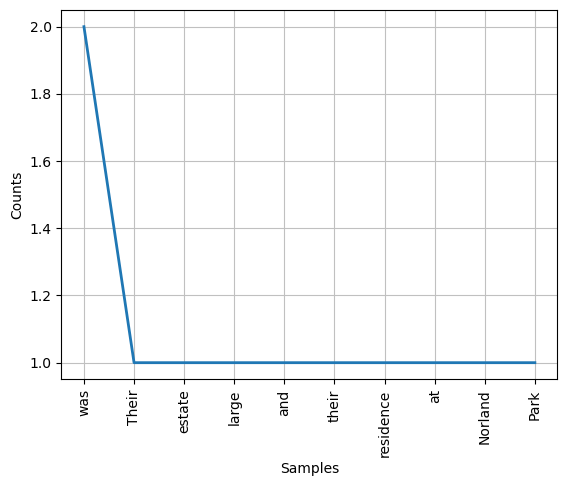

In [16]:
text.plot(10)
plt.show()

In [17]:
fd = text.vocab()

In [28]:
from nltk import FreqDist
stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear', 'No']
emma_token = pos_tag(retToken.tokenize(sense_raw))
word_list = [t[0] for t in emma_token if t[1] == 'NN' and t[0] not in stopwords]
word_list

['Sense',
 'family',
 'estate',
 'residence',
 'centre',
 'property',
 'manner',
 'opinion',
 'surrounding',
 'owner',
 'estate',
 'man',
 'age',
 'life',
 'companion',
 'housekeeper',
 'sister',
 'death',
 'alteration',
 'home',
 'loss',
 'house',
 'family',
 'inheritor',
 'estate',
 'person',
 'society',
 'nephew',
 'niece',
 's',
 'attachment',
 'attention',
 'interest',
 'goodness',
 'heart',
 'degree',
 'comfort',
 'age',
 'cheerfulness',
 'relish',
 'existence',
 'marriage',
 'son',
 'lady',
 'son',
 'man',
 'fortune',
 'mother',
 'half',
 'coming',
 'age',
 'marriage',
 'likewise',
 'wealth',
 'succession',
 'estate',
 'father',
 's',
 'property',
 'mother',
 'nothing',
 'father',
 'disposal',
 'moiety',
 'wife',
 's',
 'fortune',
 'child',
 'life',
 'interest',
 'gentleman',
 'disappointment',
 'pleasure',
 'estate',
 'nephew',
 'value',
 'sake',
 'wife',
 'son',
 'son',
 'son',
 'son',
 'child',
 'way',
 'power',
 'provision',
 'charge',
 'estate',
 'sale',
 'whole',
 'benefit

In [29]:
fd_name = FreqDist(word_list)
fd_name

FreqDist({'s': 347, 'sister': 257, 'mother': 256, 'time': 237, 'thing': 185, 'nothing': 170, 'house': 159, 'day': 150, 'heart': 127, 'man': 121, ...})

In [31]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np


In [39]:
im = Image.open('data/t1.jpg')
mask_arr = np.array(im)
mask_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

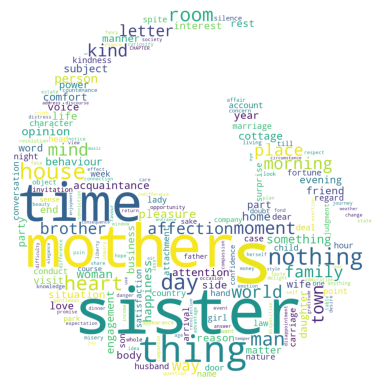

In [40]:
wc = WordCloud(width=1000, height=800, background_color='white', mask=mask_arr, random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.savefig('data/t1_wc.jpg')
plt.show()